<a href="https://colab.research.google.com/github/harrysharma/Ted_talk_view_prediction/blob/main/Hari_myTED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',500)
pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import ast
import calendar
%config InlineBackend.figure_format = 'retina'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
filepath='/content/drive/MyDrive/AlmaBetter/Capston Project 3 Ted Talk Analysis/Code/Data/data_ted_talks.csv'

In [8]:
dataset=pd.read_csv(filepath)

In [9]:
dataset['related_views']=dataset['related_talks'].apply(lambda x: np.mean([val for val in ast.literal_eval(x).keys()]))

In [10]:
dataset.shape

(4005, 20)

In [11]:
dataset.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,related_views
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",14984.166667
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",1959.333333
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",1774.333333
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,3966.500000
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,3075.000000


In [12]:
dataset.info()        #comments,about_speakers, occupations, all_speakers, has null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [13]:
df=dataset.copy()

In [14]:
df.describe([.75,.9])

,talk_id,views,comments,duration,related_views
count,4005.000000,4.005000e+03,3350.000000,4005.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236,9954.031269
std,17447.576262,3.451226e+06,268.838922,361.775462,9420.306046
min,1.000000,0.000000e+00,0.000000,60.000000,97.500000
50%,2333.000000,1.375508e+06,89.000000,738.000000,7777.500000
75%,23777.000000,2.133110e+06,188.000000,974.000000,14980.333333
90%,44241.800000,3.994610e+06,351.100000,1133.000000,23485.766667
max,62794.000000,6.505195e+07,6449.000000,3922.000000,59354.833333


In [15]:
df.describe(include='object')

,title,speaker_1,all_speakers,occupations,about_speakers,recorded_date,published_date,event,native_lang,available_lang,topics,related_talks,url,description,transcript
count,4005,4005,4001,3483,3502,4004,4005,4005,4005,4005,4005,4005,4005,4005,4005
unique,4005,3274,3306,2049,2977,1334,2962,459,12,3902,3977,4005,4005,4005,4005
top,Bring back the woolly mammoth!,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,2017-04-24,2017-09-07,TED-Ed,en,['en'],"['TED-Ed', 'math']","{161: 'The joy of lexicography', 148: 'The 4 ...",https://www.ted.com/talks/sebastian_junger_why...,"What if Andy Warhol had it wrong, and instead ...",What if you could take a pill or a vaccine and...
freq,1,34,34,53,10,97,27,556,3957,24,8,1,1,1,1


In [16]:
df['published_date']=pd.to_datetime(df['published_date'],format='%Y-%m-%d')
df['recorded_date']=pd.to_datetime(df['recorded_date'],format='%Y-%m-%d')

In [17]:

df['month'] = pd.DatetimeIndex(df['published_date']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['year'] = pd.DatetimeIndex(df['published_date']).year
df['day'] = pd.DatetimeIndex(df['published_date']).day

last_publishing_date = df['published_date'].max()
df['time_after_published']=last_publishing_date - pd.DatetimeIndex(df['published_date'])
df['days_to_publish']=df['published_date'] - df['recorded_date']
df['time_after_published'] = pd.to_numeric(df['time_after_published'].dt.days, downcast='integer')
df['days_to_publish'] = pd.to_numeric(df['days_to_publish'].dt.days, downcast='integer')

In [18]:
df['occupations'].fillna(str({0:['other']}),inplace=True,axis=0)

In [19]:
df['occupations']=df['occupations'].apply(lambda x:[val for val in ast.literal_eval(x).values() ])

In [20]:
df.drop(index=[3389],axis=0,inplace=True)   #data about speaker in japnese

# **Feature Engineering**


In [21]:
df.drop(['talk_id','speaker_1','all_speakers','url'],axis=1,inplace=True)

In [22]:
df.columns

Index(['title', 'occupations', 'about_speakers', 'views', 'recorded_date',
       'published_date', 'event', 'native_lang', 'available_lang', 'comments',
       'duration', 'topics', 'related_talks', 'description', 'transcript',
       'related_views', 'month', 'year', 'day', 'time_after_published',
       'days_to_publish'],
      dtype='object')

In [23]:
df['related_talks'] = df['related_talks'].apply(lambda x: [val for val in ast.literal_eval(x).values()])

In [24]:
df['about_speakers'].fillna(str({0:''}),inplace=True,axis=0)
df['about_speakers']=df['about_speakers'].apply(lambda x: [val for val in ast.literal_eval(x).values()])

In [25]:
df['avail_lang_count']=df['available_lang'].apply(lambda x: len(x))

In [26]:
df['views']=df['views'].apply(lambda x: 1 if x in range(0,880000) else 2 if x in range(880000,1400000) else 3 if x in range(1400000,2000000) else 4 )#if x in range(2000000,6000000) else 5 )

In [27]:
df['views'].value_counts()

4    1112
2    1044
1     998
3     850
Name: views, dtype: int64

##Removing Punctuations

In [28]:
def remove_punctuation(text):
  '''a function for removing punctuation'''
  text=' '.join(text)
  # replacing the punctuations with no space, 
  # which in effect deletes the punctuation marks 
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [29]:
df['related_talks'] = df['related_talks'].apply(remove_punctuation)
df['title']=df['title'].apply(remove_punctuation)

In [30]:
df.head(5)

,title,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,related_views,month,year,day,time_after_published,days_to_publish,avail_lang_count
0,A v e r t i n g t h e c l i m a t e c r ...,[[climate advocate]],[Nobel Laureate Al Gore focused the world’s at...,4,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...",New thinking on the climate crisis The busines...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",14984.166667,Jun,2006,27,5056,122.0,270
1,T h e b e s t s t a t s y o u v e e v...,[[global health expert; data visionary]],"[In Hans Rosling’s hands, data sings. Global t...",4,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...",Own your bodys data A visual history of human ...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",1959.333333,Jun,2006,27,5056,125.0,303
2,S i m p l i c i t y s e l l s,[[technology columnist]],[David Pogue is the personal technology column...,3,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...",10 top timesaving tech tips The first secret o...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",1774.333333,Jun,2006,27,5056,123.0,165
3,G r e e n i n g t h e g h e t t o,[[activist for environmental justice]],[Majora Carter redefined the field of environm...,4,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",3 stories of local ecoentrepreneurship A new v...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,3966.500000,Jun,2006,27,5056,121.0,219
4,D o s c h o o l s k i l l c r e a t i v ...,"[[author, educator]]",[Creativity expert Sir Ken Robinson challenges...,4,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...",Bring on the learning revolution How to escape...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,3075.000000,Jun,2006,27,5056,122.0,387


##Removing Stopwords

In [31]:
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet=WordNetLemmatizer()
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [32]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [33]:
corpus=[]
def remove_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [wordnet.lemmatize(word.lower()) for word in text.split() if word.lower() not in sw]
  corpus.append(text)
  # joining the list of words with space separator
  return " ".join(text)

In [34]:
df['related_talks'] = df['related_talks'].apply(remove_stopwords)

In [35]:
x_feat='related_talks'
y = df['views']
x = df[x_feat]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13)

In [37]:
tf=CountVectorizer('english',lowercase=True)

In [38]:
train_Tfidf=tf.fit_transform(X_train)
random_regressor=RandomForestClassifier(n_estimators=500,criterion='entropy')
random_regressor.fit(train_Tfidf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
test_Tfidf=tf.transform(X_test).toarray()
test_predict=random_regressor.predict(test_Tfidf)

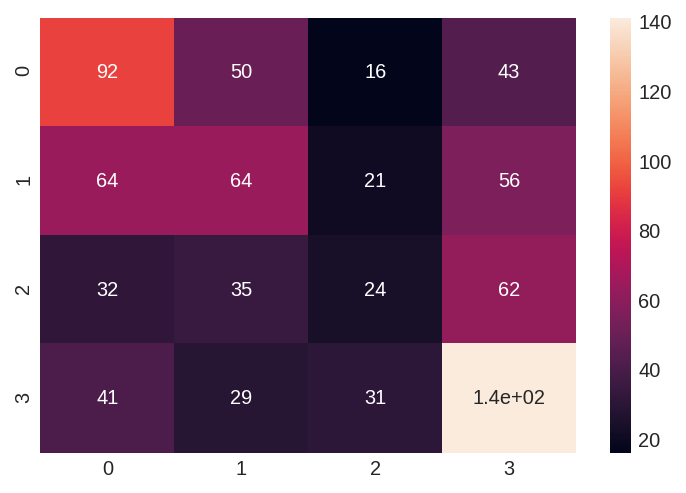

In [40]:
cm1 = confusion_matrix(y_test, test_predict)
sns.heatmap(cm1, annot = True)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict_test))


NameError: ignored

In [ ]:
random_regressor=LinearRegression()
random_regressor.fit(train_Tfidf,y_train)

In [ ]:
test_Tfidf=tf.transform(X_test).toarray()
test_predict=random_regressor.predict(test_Tfidf)

In [ ]:
test_Tfidf=tf.transform(X_test).toarray()
test_predict=random_regressor.predict(test_Tfidf)

In [ ]:
mse=r2_score(test_predict,y_test)
mse

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(train_Tfidf, y_train)

In [ ]:
y_predict_test = NB_classifier.predict(test_Tfidf)

In [ ]:
r2=r2_score(test_predict,y_test)
r2

In [ ]:
!pip install  catboost
from catboost import CatBoostRegressor